<a href="https://colab.research.google.com/github/gauravraidata/IITJ-projects/blob/main/ML_Ass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Q1

Q1: Download the following dataset diabetes (1).csv - Google Drive. ( 10 Marks )
a) Find the optimum number of principal components for the features in the
above-mentioned data
b) Use any two classification models of your choice and find the prediction accuracy and
error between the reduced data (with an optimum number of principal components) and
the complete data.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

####preprocessing

In [3]:
dbt_df = pd.read_csv("/content/drive/MyDrive/Assignment files/Ass2 ML/diabetes (1).csv")

In [4]:
dbt_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
dbt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dbt_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
#splitting into training and testing data
dbt_train = dbt_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
dbt_test = dbt_df['Outcome']

In [11]:
dbt_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
#using standard scaler we will scale the train data

scaler = StandardScaler()
scaler.fit(dbt_train)
scaled_data = scaler.transform(dbt_train)

In [13]:
scaled_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

####PCA

In [14]:
pca = PCA()
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)

In [16]:
x_pca.shape

(768, 8)

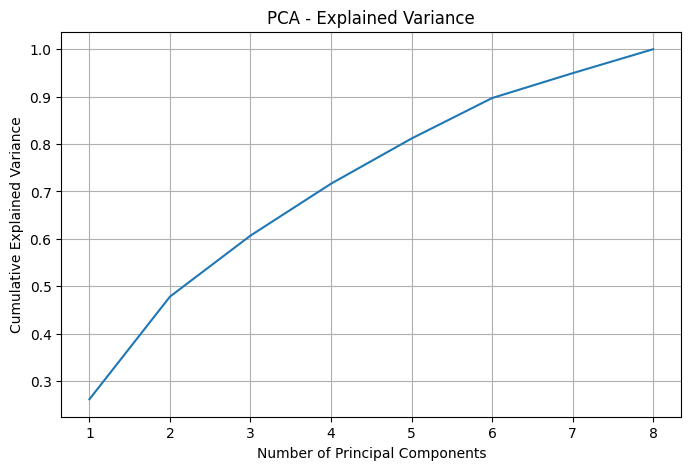

Optimum number of components to retain 95% variance: 8


In [17]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, len(pca.explained_variance_ratio_)+1), y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
opt_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimum number of components to retain 95% variance: {opt_components}")

####Classification Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, dbt_test, test_size=0.2, random_state=42)

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1)
print("\nModel: Logistic Regression (Original Data)")
print("Accuracy:", acc1)
print("Error:", 1 - acc1)

model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)
print("\nModel: Random Forest (Original Data)")
print("Accuracy:", acc2)
print("Error:", 1 - acc2)



Model: Logistic Regression (Original Data)
Accuracy: 0.7532467532467533
Error: 0.24675324675324672

Model: Random Forest (Original Data)
Accuracy: 0.7272727272727273
Error: 0.2727272727272727


In [21]:
# PCA transform
pca = PCA(n_components=opt_components)
X_pca_reduced = pca.fit_transform(scaled_data)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_reduced, dbt_test, test_size=0.2, random_state=42)

model1_pca = LogisticRegression()
model1_pca.fit(X_train_pca, y_train_pca)
y_pred1_pca = model1_pca.predict(X_test_pca)
acc1_pca = accuracy_score(y_test_pca, y_pred1_pca)
print("\nModel: Logistic Regression (PCA Reduced Data)")
print("Accuracy:", acc1_pca)
print("Error:", 1 - acc1_pca)

model2_pca = RandomForestClassifier(random_state=42)
model2_pca.fit(X_train_pca, y_train_pca)
y_pred2_pca = model2_pca.predict(X_test_pca)
acc2_pca = accuracy_score(y_test_pca, y_pred2_pca)
print("\nModel: Random Forest (PCA Reduced Data)")
print("Accuracy:", acc2_pca)
print("Error:", 1 - acc2_pca)


Model: Logistic Regression (PCA Reduced Data)
Accuracy: 0.7532467532467533
Error: 0.24675324675324672

Model: Random Forest (PCA Reduced Data)
Accuracy: 0.7012987012987013
Error: 0.2987012987012987


###Q2

Q2: We will use the fashion-MNIST dataset for this question (you can download it from any
other source also including libraries). Flatten and preprocess the data (if required) before starting
the tasks. It will become a 784-dimensional data with 10 classes, more details are available in the
link. ( 20 Marks )
a) Train the k-means model on f-MNIST data with k = 10 and 10 random 784-dimensional
points (in input range) as initializations. Report the number of points in each cluster.
b) Visualize the cluster centers of each cluster as 2D images of all clusters.
c) Visualize 10 images corresponding to each cluster.
d) Train another k-means model with 10 images from each class as initializations , report the
number of points in each cluster, and visualize the cluster centers.
e) Visualize 10 images corresponding to each cluster.
f) Evaluate Clusters of part a and part d with Sum of Squared Error (SSE) method. Report
the scores and comment on which case is a better clustering.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score
from tensorflow.keras.datasets import fashion_mnist

In [24]:
(X_train, y_train), (_, _) = fashion_mnist.load_data()
X = X_train.reshape(-1, 784) / 255.0  # Normalize and flatten
y = y_train

In [25]:
np.random.seed(42)
random_init = np.random.uniform(low=0, high=1, size=(10, 784))
kmeans_random = KMeans(n_clusters=10, init=random_init, n_init=1, random_state=42)
kmeans_random.fit(X)

KMeans(init=array([[0.37454012, 0.95071431, 0.73199394, ..., 0.54272444, 0.25179906,
        0.34569599],
       [0.18159772, 0.90845056, 0.58339179, ..., 0.42373825, 0.6675499 ,
        0.09553531],
       [0.62385932, 0.45176768, 0.58660846, ..., 0.01013118, 0.63609605,
        0.91328695],
       ...,
       [0.60968191, 0.91509845, 0.15636214, ..., 0.63822442, 0.35000687,
        0.92837255],
       [0.06562609, 0.54941183, 0.59086627, ..., 0.4837969 , 0.4904491 ,
        0.11974679],
       [0.80265624, 0.24696541, 0.89961249, ..., 0.69186391, 0.38306937,
        0.86909907]]),
       n_clusters=10, n_init=1, random_state=42)

In [26]:
unique, counts = np.unique(kmeans_random.labels_, return_counts=True)
print("Cluster counts (random init):", dict(zip(unique, counts)))

Cluster counts (random init): {np.int32(0): np.int64(4268), np.int32(1): np.int64(2990), np.int32(2): np.int64(7382), np.int32(3): np.int64(9552), np.int32(4): np.int64(7817), np.int32(5): np.int64(7373), np.int32(6): np.int64(2570), np.int32(7): np.int64(2368), np.int32(8): np.int64(9109), np.int32(9): np.int64(6571)}


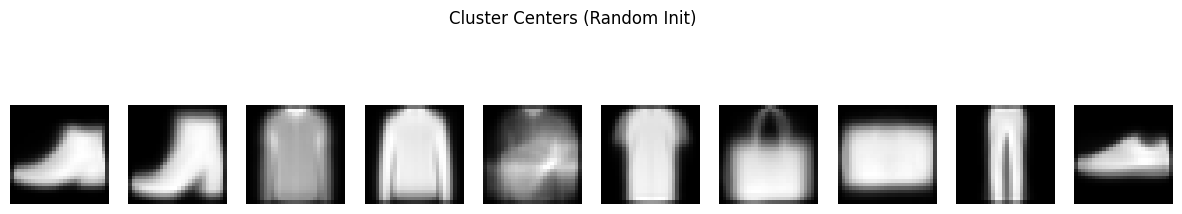

In [27]:
def show_cluster_centers(centers, title):
    fig, axes = plt.subplots(1, 10, figsize=(15, 3))
    for i, ax in enumerate(axes):
        ax.imshow(centers[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

show_cluster_centers(kmeans_random.cluster_centers_, "Cluster Centers (Random Init)")

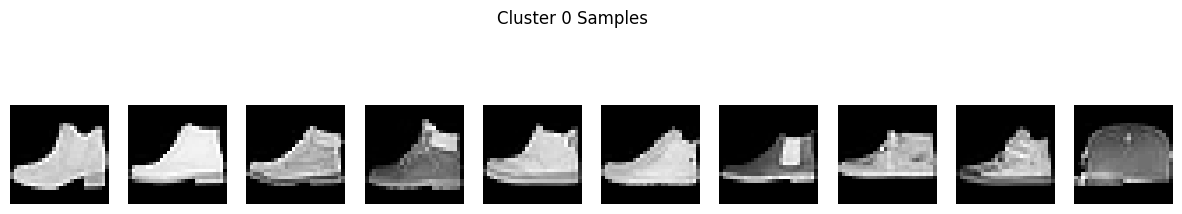

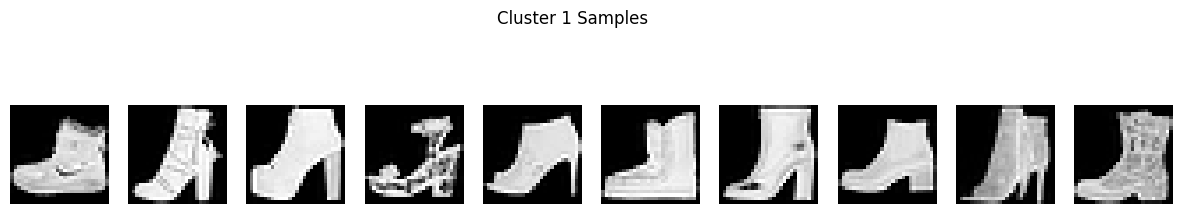

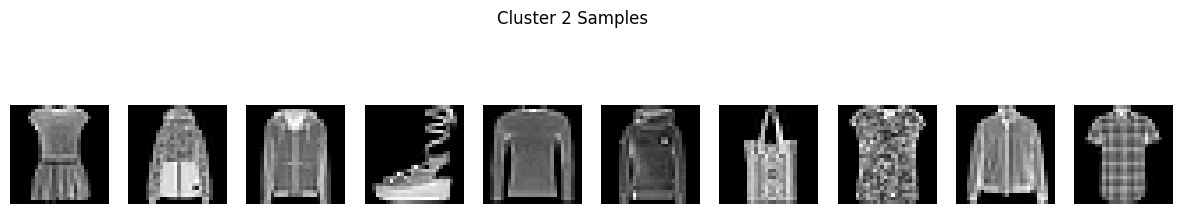

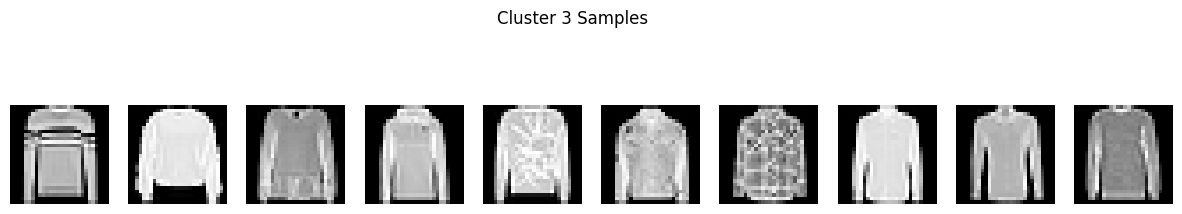

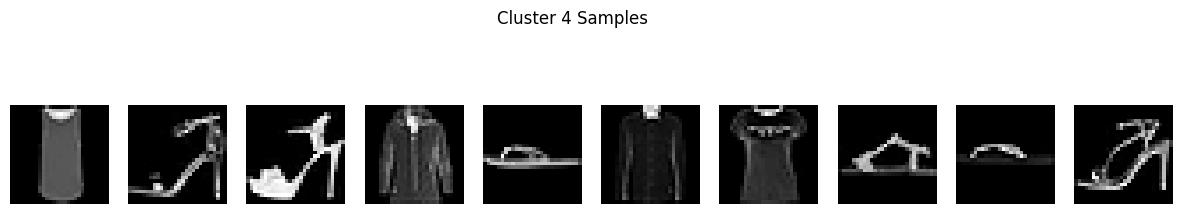

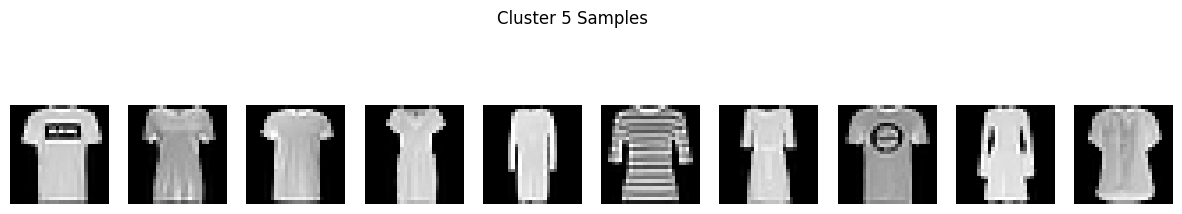

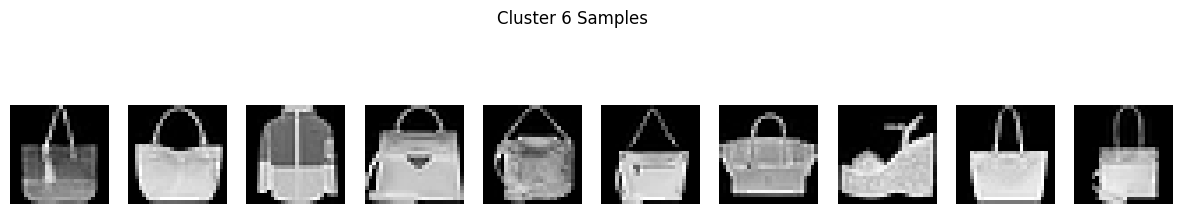

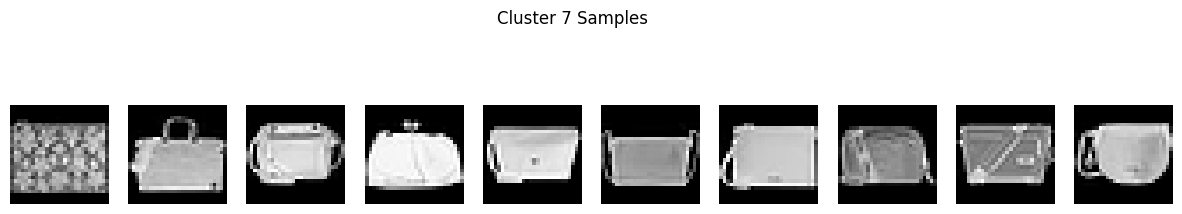

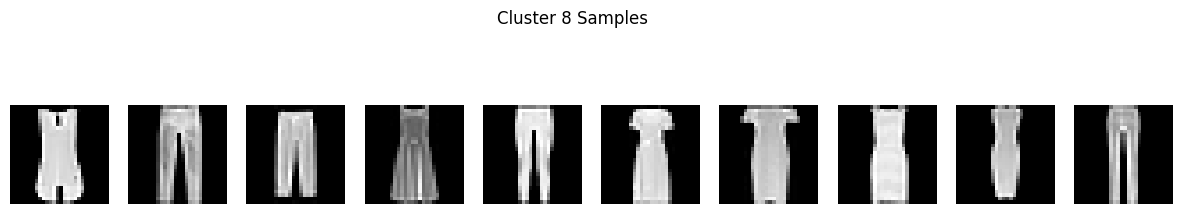

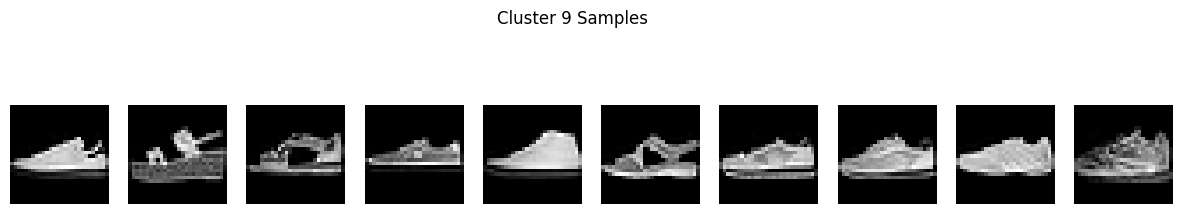

In [28]:
def show_cluster_samples(X, labels, cluster_id):
    indices = np.where(labels == cluster_id)[0][:10]
    fig, axes = plt.subplots(1, 10, figsize=(15, 3))
    for i, ax in enumerate(axes):
        ax.imshow(X[indices[i]].reshape(28, 28), cmap='gray')
        ax.axis('off')
    plt.suptitle(f"Cluster {cluster_id} Samples")
    plt.show()

for cluster_id in range(10):
    show_cluster_samples(X, kmeans_random.labels_, cluster_id)

In [29]:
init_images = []
for i in range(10):
    idx = np.where(y == i)[0][:1]
    init_images.append(X[idx[0]])
init_images = np.array(init_images)

kmeans_class_init = KMeans(n_clusters=10, init=init_images, n_init=1, random_state=42)
kmeans_class_init.fit(X)

unique2, counts2 = np.unique(kmeans_class_init.labels_, return_counts=True)
print("Cluster counts (class-based init):", dict(zip(unique2, counts2)))

Cluster counts (class-based init): {np.int32(0): np.int64(6141), np.int32(1): np.int64(5110), np.int32(2): np.int64(8880), np.int32(3): np.int64(5080), np.int32(4): np.int64(7642), np.int32(5): np.int64(6271), np.int32(6): np.int64(5495), np.int32(7): np.int64(6898), np.int32(8): np.int64(2767), np.int32(9): np.int64(5716)}


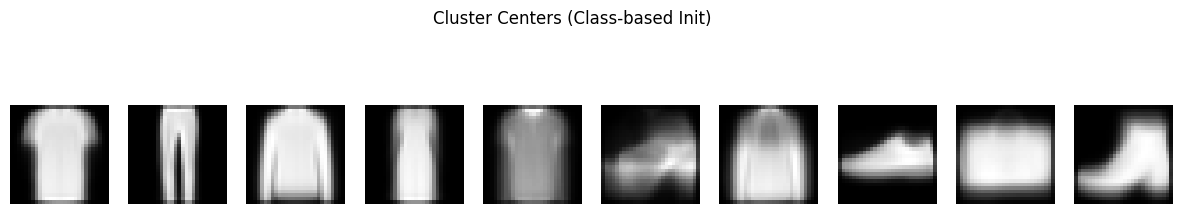

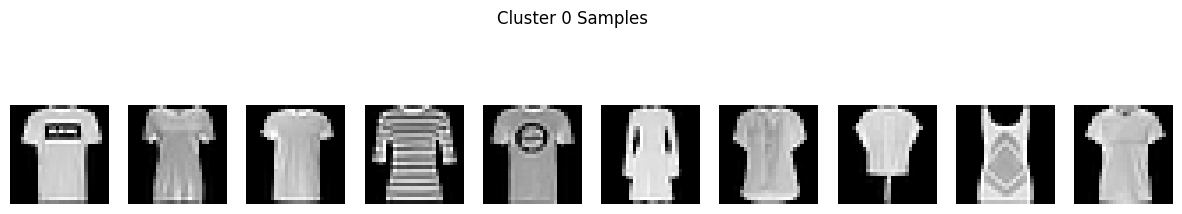

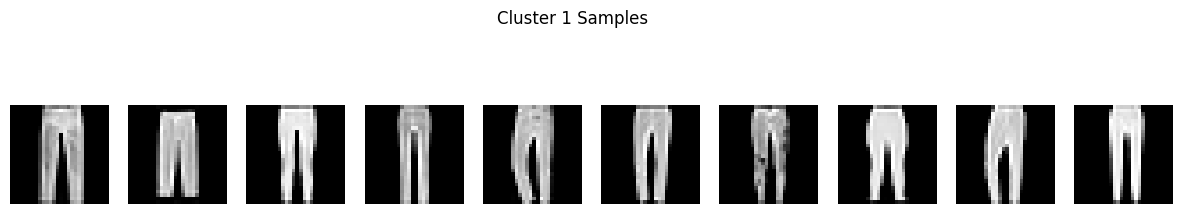

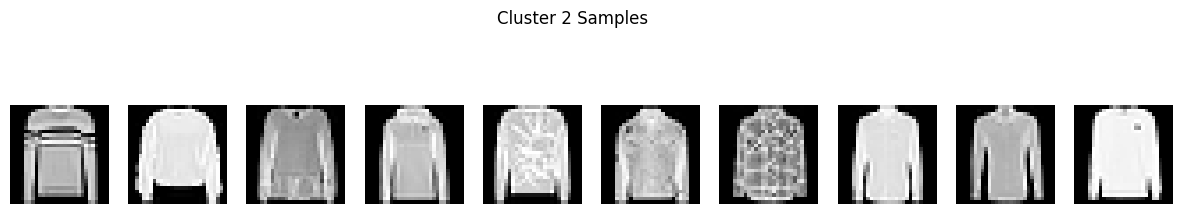

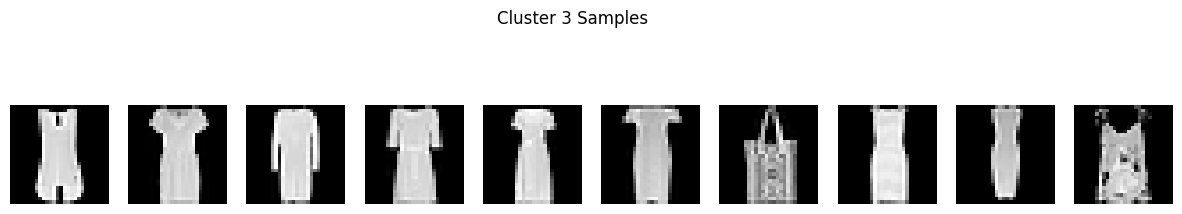

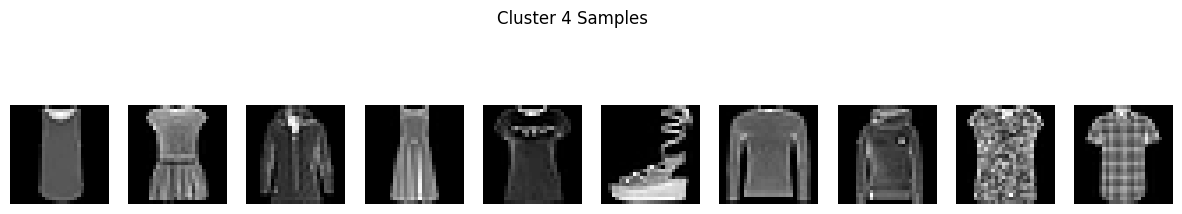

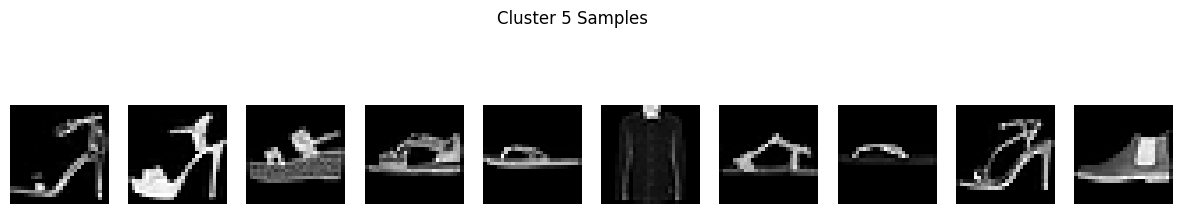

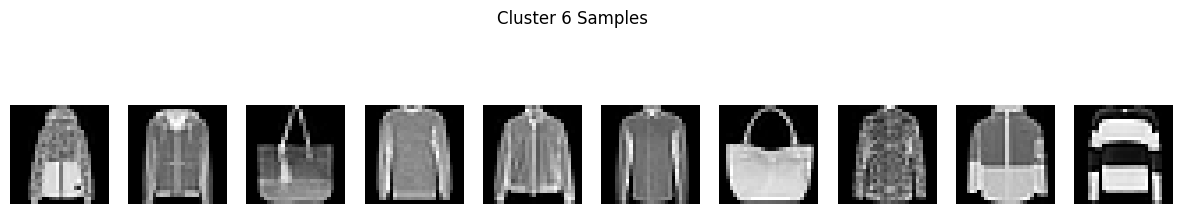

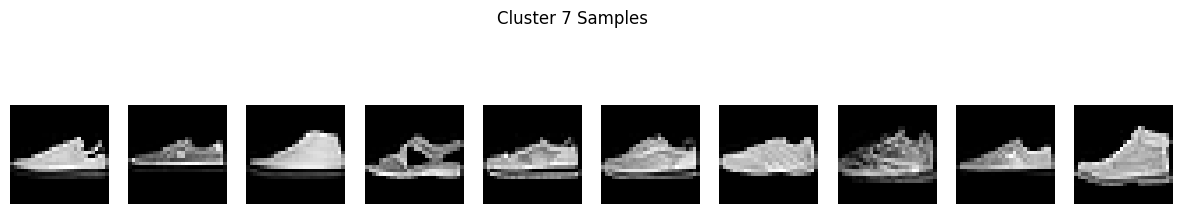

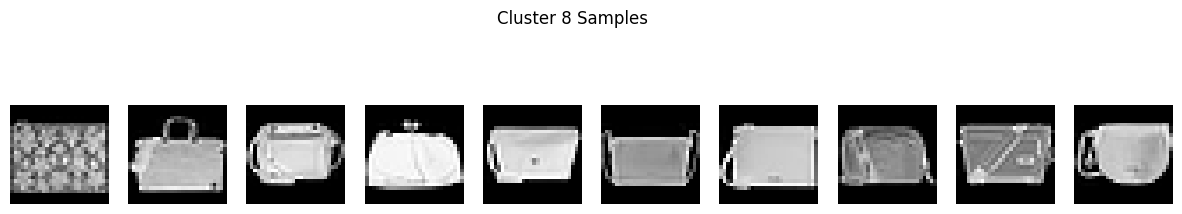

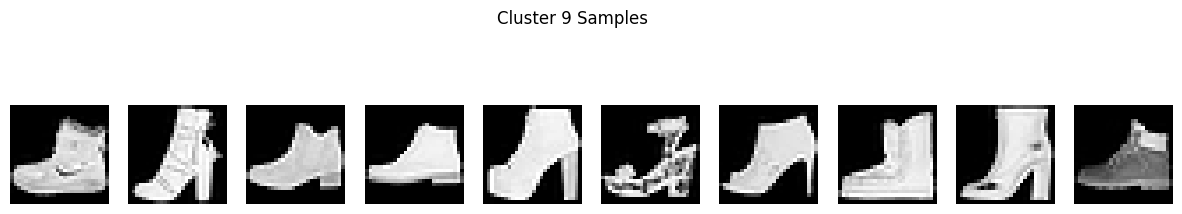

In [30]:
show_cluster_centers(kmeans_class_init.cluster_centers_, "Cluster Centers (Class-based Init)")

# Visualize 10 sample images from each cluster
for cluster_id in range(10):
    show_cluster_samples(X, kmeans_class_init.labels_, cluster_id)

In [31]:
sse_random = kmeans_random.inertia_
sse_class_init = kmeans_class_init.inertia_

print(f"\nSSE (Random Init): {sse_random}")
print(f"SSE (Class-Based Init): {sse_class_init}")

if sse_random < sse_class_init:
    print("🔍 Random initialization leads to better clustering (lower SSE).")
else:
    print("🔍 Class-based initialization leads to better clustering (lower SSE).")


SSE (Random Init): 1906659.506008077
SSE (Class-Based Init): 1934446.9182210853
🔍 Random initialization leads to better clustering (lower SSE).


###Q3

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [33]:
digits = load_digits()
X = digits.data / 16.0  # Normalize (pixel values from 0-16)
y = digits.target.reshape(-1, 1)

In [35]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
y_train_labels = np.argmax(y_train, axis=1)  # for sklearn comparison later
y_test_labels = np.argmax(y_test, axis=1)

In [37]:
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size, lr=0.1):
        self.lr = lr
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def compute_loss(self, y_true, y_pred):
        return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))

    def backward(self, X, y_true):
        m = y_true.shape[0]
        dz2 = self.a2 - y_true
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Update weights
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    def train(self, X, y, X_val, y_val, epochs=50):
        history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
        for epoch in range(epochs):
            output = self.forward(X)
            loss = self.compute_loss(y, output)
            self.backward(X, y)

            val_output = self.forward(X_val)
            val_loss = self.compute_loss(y_val, val_output)

            train_preds = np.argmax(output, axis=1)
            val_preds = np.argmax(val_output, axis=1)

            train_acc = accuracy_score(np.argmax(y, axis=1), train_preds)
            val_acc = accuracy_score(np.argmax(y_val, axis=1), val_preds)

            history['train_loss'].append(loss)
            history['val_loss'].append(val_loss)
            history['train_acc'].append(train_acc)
            history['val_acc'].append(val_acc)

            print(f"Epoch {epoch+1}: Train Loss={loss:.4f}, Val Loss={val_loss:.4f}, Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")
        return history

In [38]:
nn = SimpleNN(input_size=64, hidden_size=32, output_size=10, lr=0.5)
history_np = nn.train(X_train, y_train, X_test, y_test, epochs=50)


Epoch 1: Train Loss=5.9810, Val Loss=4.3553, Train Acc=0.1009, Val Acc=0.1278
Epoch 2: Train Loss=4.4060, Val Loss=3.5848, Train Acc=0.1169, Val Acc=0.0889
Epoch 3: Train Loss=3.6003, Val Loss=3.0952, Train Acc=0.0981, Val Acc=0.1028
Epoch 4: Train Loss=3.1289, Val Loss=2.7744, Train Acc=0.1169, Val Acc=0.1194
Epoch 5: Train Loss=2.8097, Val Loss=2.5550, Train Acc=0.1294, Val Acc=0.1361
Epoch 6: Train Loss=2.5901, Val Loss=2.4018, Train Acc=0.1406, Val Acc=0.1611
Epoch 7: Train Loss=2.4337, Val Loss=2.2893, Train Acc=0.1475, Val Acc=0.1750
Epoch 8: Train Loss=2.3176, Val Loss=2.2011, Train Acc=0.1642, Val Acc=0.2028
Epoch 9: Train Loss=2.2263, Val Loss=2.1268, Train Acc=0.1914, Val Acc=0.2389
Epoch 10: Train Loss=2.1496, Val Loss=2.0604, Train Acc=0.2248, Val Acc=0.2611
Epoch 11: Train Loss=2.0815, Val Loss=1.9989, Train Acc=0.2519, Val Acc=0.2917
Epoch 12: Train Loss=2.0186, Val Loss=1.9414, Train Acc=0.2728, Val Acc=0.3111
Epoch 13: Train Loss=1.9599, Val Loss=1.8873, Train Acc=0.299

In [39]:
preds_np = nn.forward(X_test)
y_pred_np = np.argmax(preds_np, axis=1)
acc_np = accuracy_score(y_test_labels, y_pred_np)
print("\nNumPy NN Test Accuracy:", acc_np)


NumPy NN Test Accuracy: 0.7166666666666667


In [40]:
mlp = MLPClassifier(hidden_layer_sizes=(32,), activation='logistic', solver='sgd', learning_rate_init=0.5, max_iter=50, random_state=42)
mlp.fit(X_train, y_train_labels)
y_pred_sklearn = mlp.predict(X_test)
acc_sklearn = accuracy_score(y_test_labels, y_pred_sklearn)
print("Sklearn NN Test Accuracy:", acc_sklearn)

Sklearn NN Test Accuracy: 0.975


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


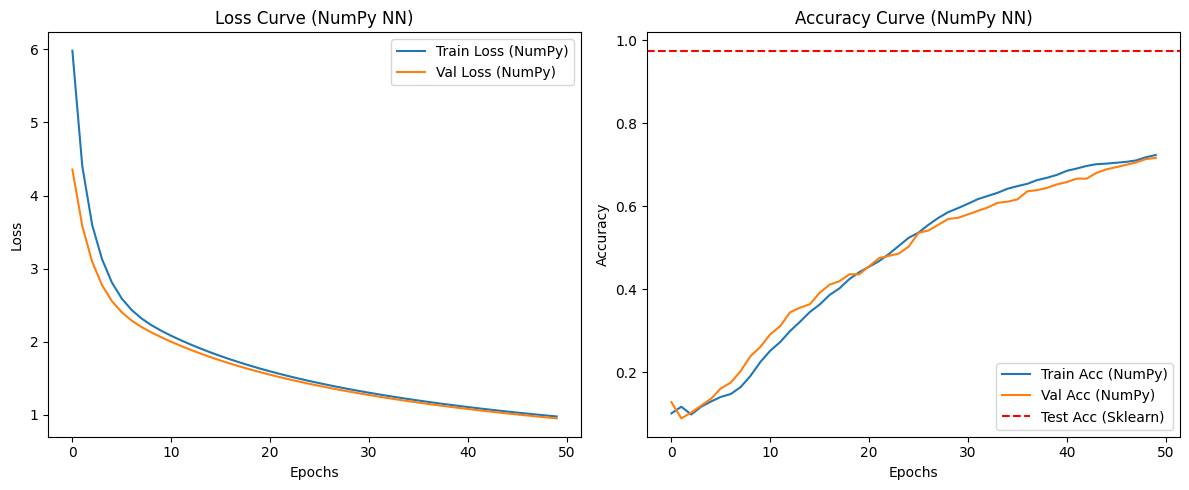

In [41]:
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_np['train_loss'], label='Train Loss (NumPy)')
plt.plot(history_np['val_loss'], label='Val Loss (NumPy)')
plt.title("Loss Curve (NumPy NN)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_np['train_acc'], label='Train Acc (NumPy)')
plt.plot(history_np['val_acc'], label='Val Acc (NumPy)')
plt.axhline(y=acc_sklearn, color='r', linestyle='--', label='Test Acc (Sklearn)')
plt.title("Accuracy Curve (NumPy NN)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

###Q4

In [ ]:
# Titanic Survival Prediction Project with Gradio Demo

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("train.csv")

# ---------------------- EDA ----------------------
print("Data Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Data Types:\n", df.dtypes)
print("Statistical Summary:\n", df.describe())

# ---------------------- Data Cleaning ----------------------
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# ---------------------- Features and Scaling ----------------------
X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df['Survived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------- Model Training ----------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ---------------------- Model Evaluation ----------------------
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ---------------------- Save Model ----------------------
joblib.dump(model, "titanic_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# ---------------------- Gradio Interface ----------------------
model = joblib.load("titanic_model.pkl")
scaler = joblib.load("scaler.pkl")

def predict_survival(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked):
    sex = 1 if Sex == "Male" else 0
    embark_dict = {"C": 0, "Q": 1, "S": 2}
    embarked = embark_dict[Embarked]
    features = np.array([[Pclass, sex, Age, SibSp, Parch, Fare, embarked]])
    features_scaled = scaler.transform(features)
    pred = model.predict(features_scaled)[0]
    return "✅ Survived" if pred == 1 else "❌ Did not Survive"

demo = gr.Interface(
    fn=predict_survival,
    inputs=[
        gr.Dropdown([1, 2, 3], label="Passenger Class (1=Upper, 3=Lower)"),
        gr.Radio(["Male", "Female"], label="Sex"),
        gr.Slider(0, 80, step=1, label="Age"),
        gr.Slider(0, 8, step=1, label="Siblings/Spouse Aboard (SibSp)"),
        gr.Slider(0, 6, step=1, label="Parents/Children Aboard (Parch)"),
        gr.Number(label="Fare"),
        gr.Radio(["C", "Q", "S"], label="Port of Embarkation")
    ],
    outputs="text",
    title="Titanic Survival Prediction 🚢",
    description="Enter passenger details and predict survival using a Random Forest Classifier."
)

# Uncomment the line below to run the demo in a local environment
# demo.launch()
